# **Praktikum 1 - linear regression**

## Import Library and Read Data 

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('Data/dataset.csv')

## Understanding data (dataset.csv)

### Show new data

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Show data size

In [4]:
data.shape

(500, 8)

### Check Data information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Show Data Description

In [6]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualization correlation with pairplot 

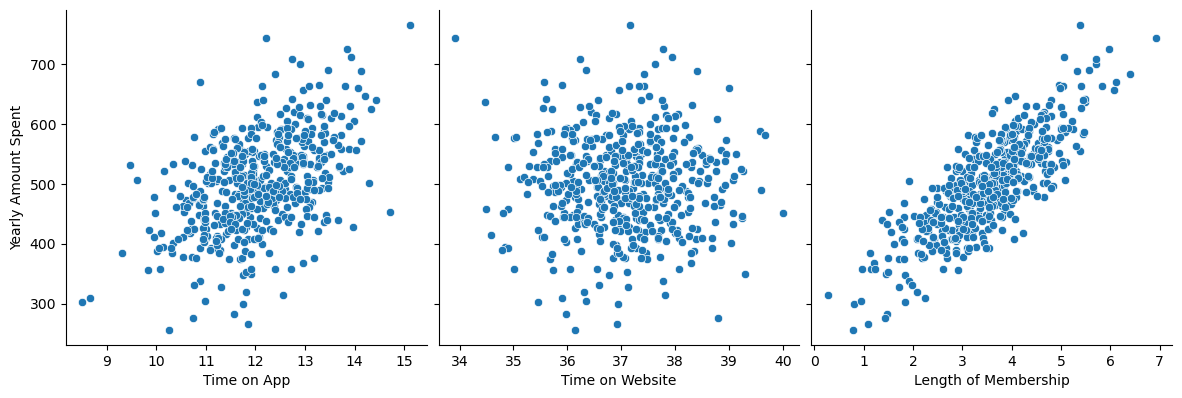

In [9]:
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'], y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

### visualize correlation with heatmap

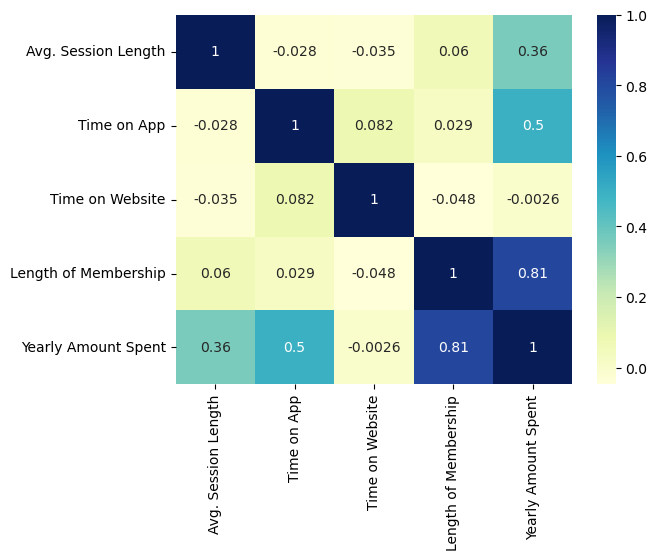

In [10]:
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu" ,annot=True)
plt.show()

## Linear Regression

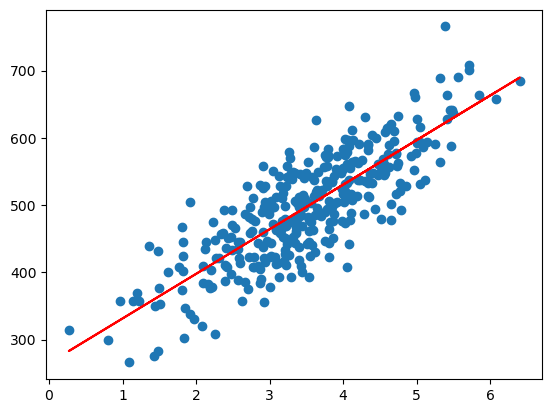

In [11]:
# simple linear regression always had one X
X = data['Length of Membership']
y = data['Yearly Amount Spent']

# split data to training and testing
# with proportion 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# training model with StatsModels library
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualizing the regression line
# create scatter plot (ball that represent data)
plt.scatter(X_train, y_train)
# crate line plot (line that represent regression line)
plt.plot(X_train, lr.params['const'] + lr.params['Length of Membership']*X_train, 'r')
plt.show()

## Residual Analysis

<Figure size 640x480 with 0 Axes>

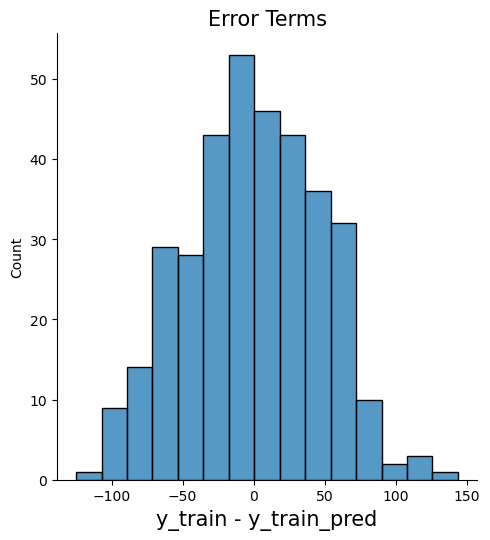

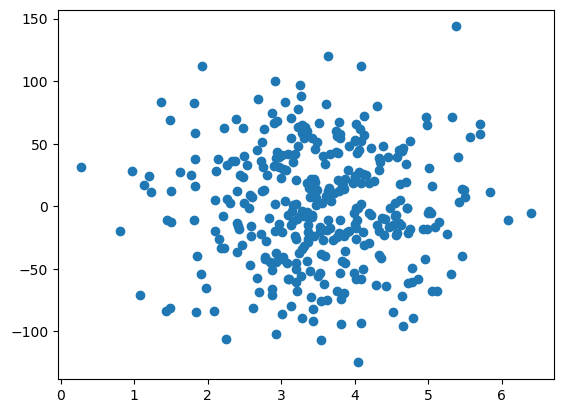

In [12]:
# prediction y value from X_train_sm that already trained
y_train_pred = lr.predict(X_train_sm)

# count residual(e) error from y_train reduced with y_train_pred
res = (y_train - y_train_pred)

# create histogram plot from residual error
fig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# create scatter plot from residual error
plt.scatter(X_train,res)
plt.show()

## Prediction on Test Data and Model Evaluation

In [13]:
# prediction y value from X_test that already trained
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

# Testing Data prediction with R-Squared
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)

# show R-Squared
# value between 0 and 1, the closer to 1 the better the model
print('R-Squared :', r_squared)

R-Squared : 0.6119489137687472


### Calculate the R-squared value to measure the performance of the model on the test data.

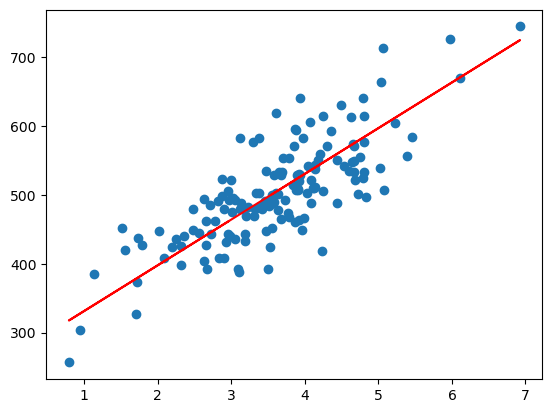

In [15]:
# create scatter plot (ball that represent data)
plt.scatter(X_test, y_test)
# crate line plot (line that represent regression line)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# **Praktikum 2 - Support Vector Regression**

## Import Library and Dataset

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Data/Posisi_gaji.csv')
dataset.head()

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Pick Feature with var X(independent) and y(dependent) in one column

In [18]:
# Level label for X and Gaji for y
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
# show value from those variable
print(f'X: \n {X} \n\n y: \n {y}')

X: 
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 

 y: 
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
# make 2 object for X and y scaler process
sc_X = StandardScaler()
sc_y = StandardScaler()
# fit and transform X and y
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))
y = y.ravel()
# show variable after scaling process
print(f'X: \n {X} \n\n y: \n {y}')

X: 
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

 y: 
 [-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


### Fitting SVR to Dataset

In [20]:
from sklearn.svm import SVR
# using kernel RBF(Radial Basis Function)
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR()

### Hasil Visualisasi SVR

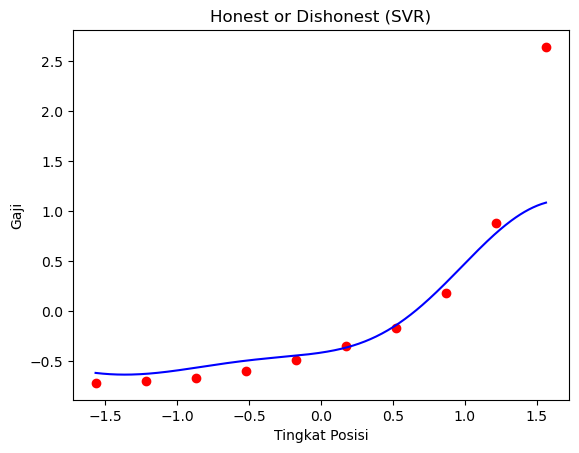

In [21]:
# create high resolution and more soft curve
X_grid = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)
# create scatter for data(with ball shape) and plot(regression line)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
# create title and label for X and y variable
plt.title('Honest or Dishonest (SVR)')
plt.xlabel('Tingkat Posisi')
plt.ylabel('Gaji')
# show result
plt.show()

### Prediction result

Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

1. Menskalakan fitur prediksi menggunakan sc_X.transform.
2. Melakukan prediksi menggunakan model SVR yang telah dilatih.
3. Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [23]:
# create 2D array with 'Tingkat Posisi' that will be predicted
prediction_tingkat_posisi = np.array([[6.5]])
# Feature scaling for predicted data
prediction_tingkat_posisi = sc_X.transform(prediction_tingkat_posisi)
# prediction process with SVR Model
prediction_gaji = regressor.predict(prediction_tingkat_posisi)
# return prediction result to original scaling
prediction_gaji = sc_y.inverse_transform(prediction_gaji.reshape(-1, 1))
# show prediction result
print(f"Prediksi Gaji untuk Tingkat Posisi 6.5:: {prediction_gaji}")

Prediksi Gaji untuk Tingkat Posisi 6.5:: [[170370.0204065]]


## SVR Model Evaluation

### check model evaluation using Mean Absolute Error(MAE), Mean Squared Error(MSE), Root Mean Squared Error(RMSE) and R-Squared

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_actual = y
y_pred = regressor.predict(X)

# with MAE
mae = mean_absolute_error(y_actual, y_pred)
# with MSE
mse = mean_squared_error(y_actual, y_pred)
# with MSE
rmse = np.sqrt(mse)
# with R-Squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-Squared: 0.7516001070620798


# **Tugas Praktikum**

### Load and Show first data

In [28]:
df = pd.read_csv('Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Show data Information

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Show Data Description

In [30]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Encoding

#### With OneHotEncoder Method

In [31]:
# encode categorical data with simple OneHotEncoder
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)
# Ensure 'charges' column is separated before reordering
charges = df['charges']
df = df.drop(columns='charges')
# Reorder columns to move 'charges' to the end
df = pd.concat([df, charges], axis=1)
df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520


### Data Visualization

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#### With Pairplot

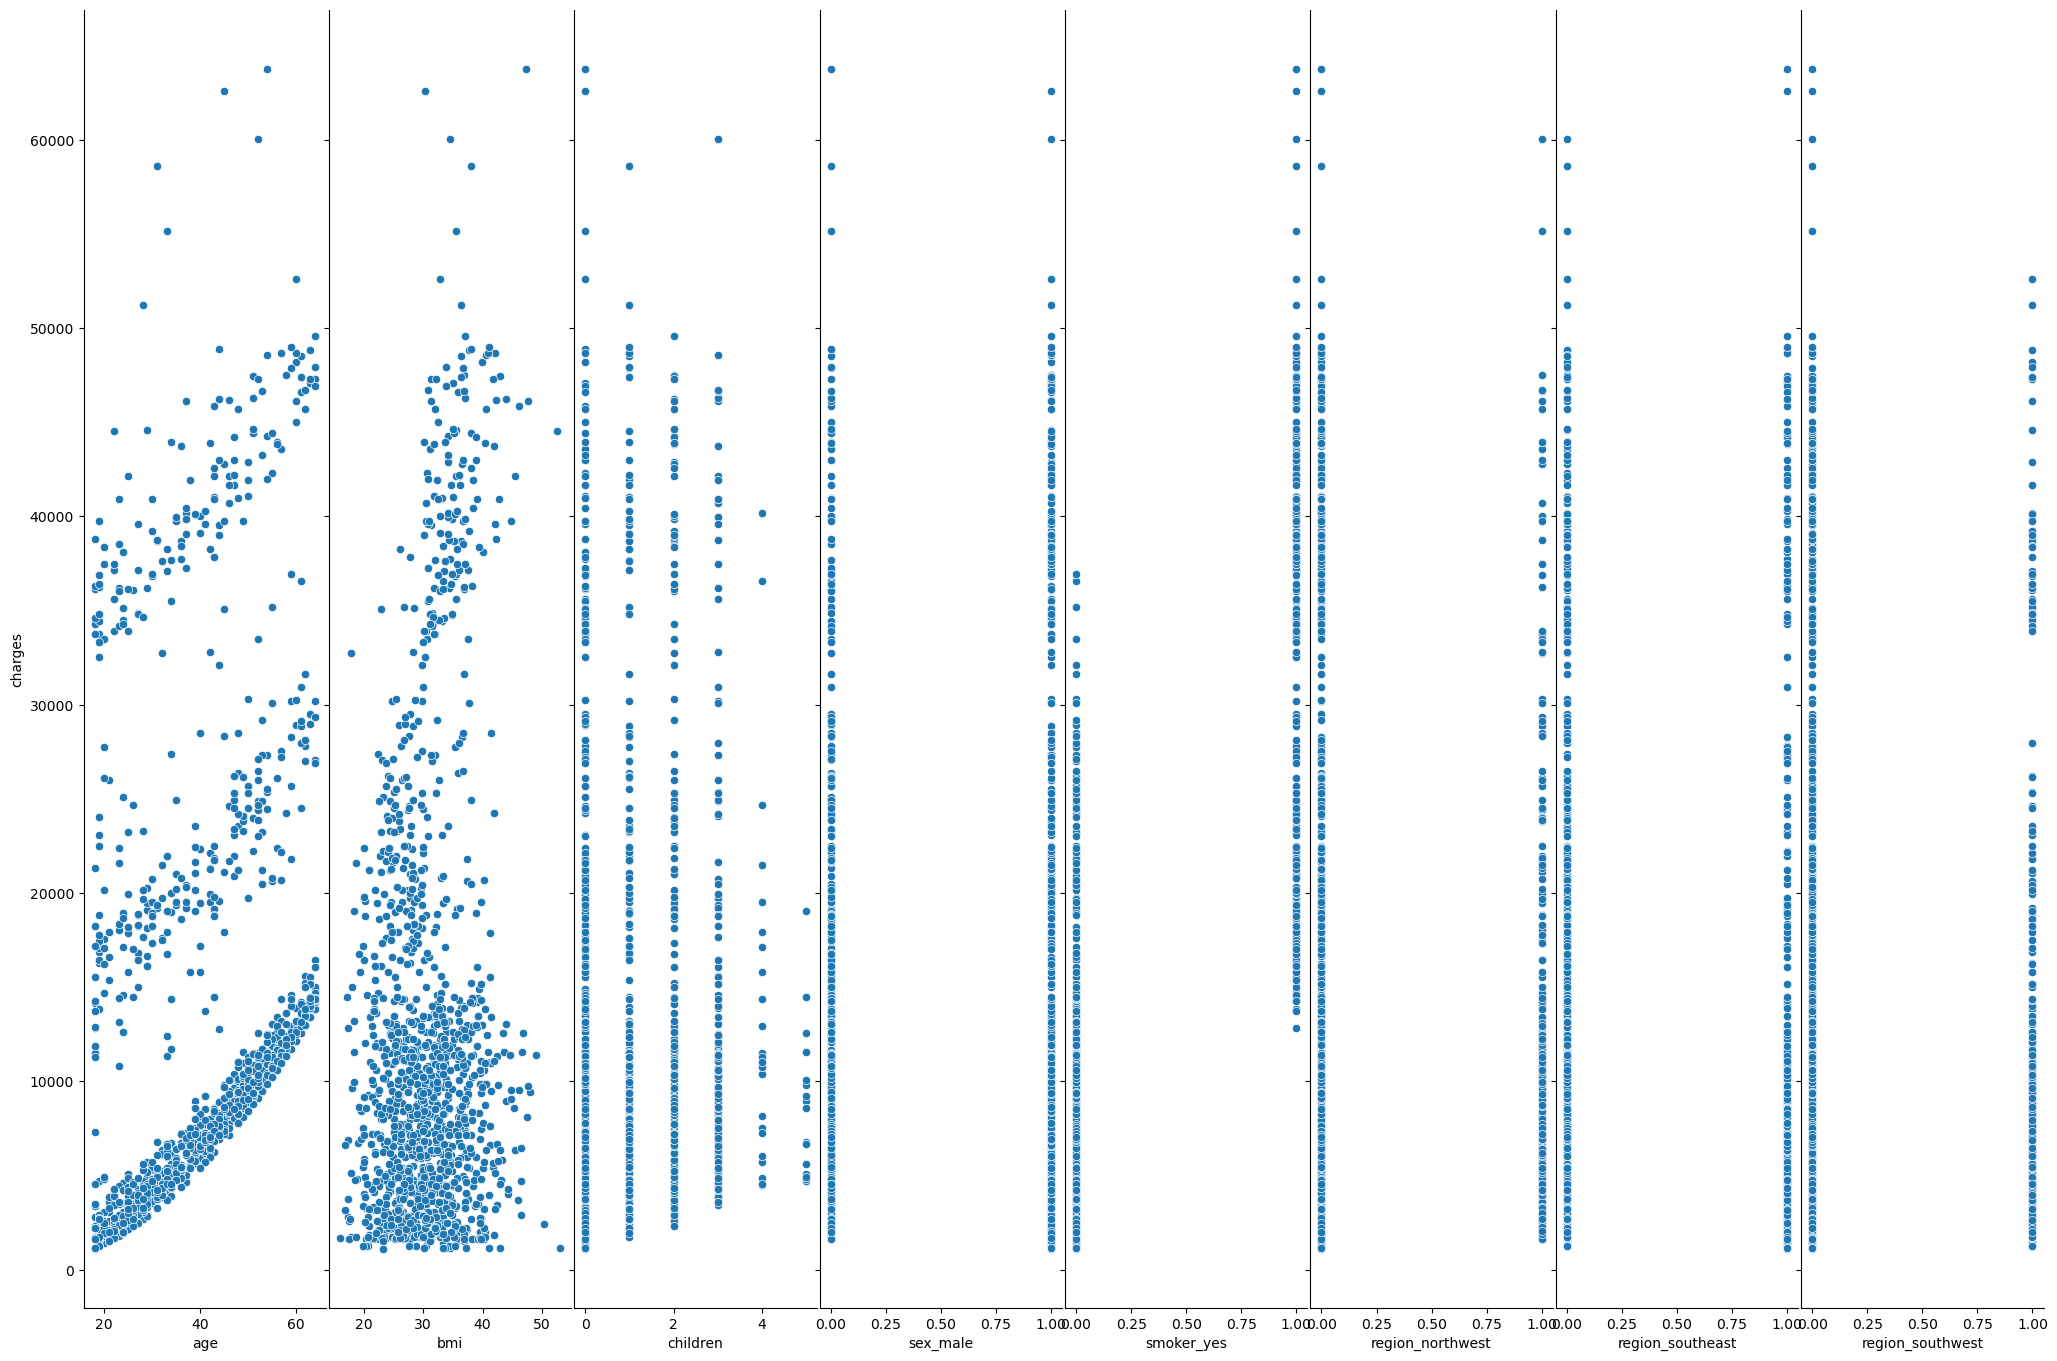

In [33]:
sns.pairplot(df, x_vars=df.columns[df.columns != 'charges'].to_list(), y_vars='charges', height=5, aspect=2, kind='scatter').fig.set_size_inches(20, 15)
plt.subplots_adjust(right=1)
plt.show()

#### With HeatMap

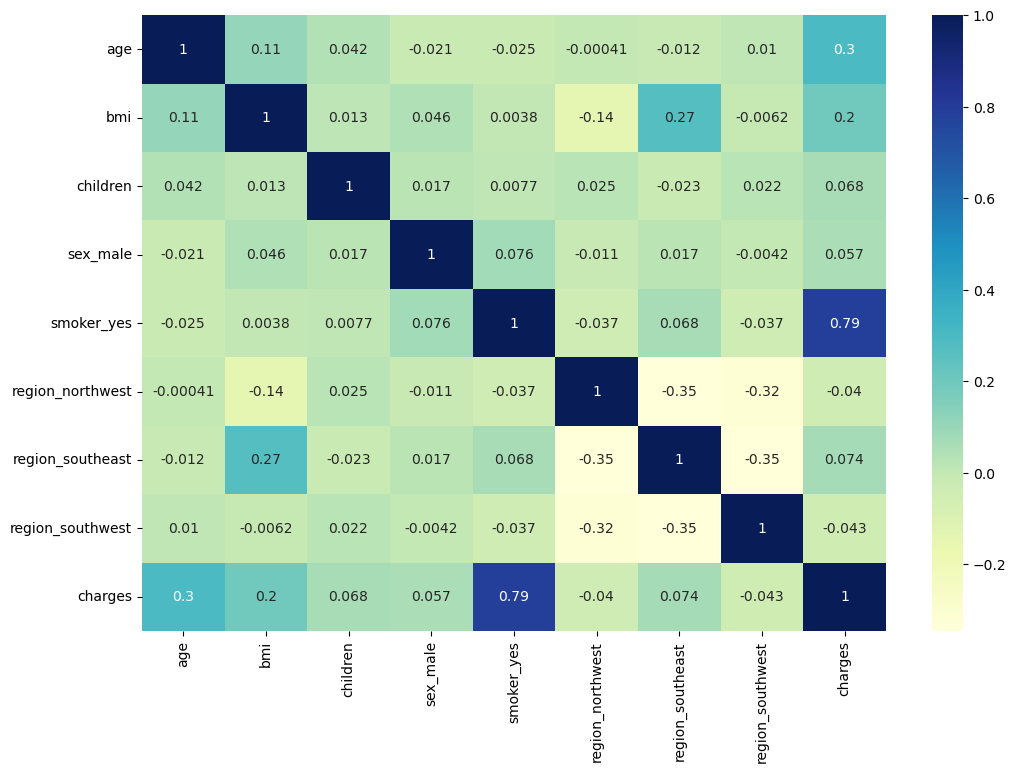

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Variable Selection

In [35]:
X = df[['age', 'bmi', 'smoker_yes']]
y = df['charges']

print(f'X: \n {X} \n\n y: \n {y}')

X: 
       age     bmi  smoker_yes
0      19  27.900           1
1      18  33.770           0
2      28  33.000           0
3      33  22.705           0
4      32  28.880           0
...   ...     ...         ...
1333   50  30.970           0
1334   18  31.920           0
1335   18  36.850           0
1336   21  25.800           0
1337   61  29.070           1

[1338 rows x 3 columns] 

 y: 
 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
# create different object for each column
# we do this, because scale each column vastly different
sc_X_age = StandardScaler()
sc_X_bmi = StandardScaler()
sc_X_smoker_yes = StandardScaler()
sc_y = StandardScaler()

# convert X data from int64 to float
# because FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas.
X = X.astype(float)

# fit and transform each column
X.loc[:, 'age'] = sc_X_age.fit_transform(X[['age']])
X.loc[:, 'bmi'] = sc_X_bmi.fit_transform(X[['bmi']])
X.loc[:, 'smoker_yes'] = sc_X_smoker_yes.fit_transform(X[['smoker_yes']])
y = sc_y.fit_transform(y.values.reshape(-1, 1))
y = y.ravel()

# Print the scaled features and target variable
print(f'X (scaled): \n{X} \n\n y (scaled): \n{y}')

X (scaled): 
           age       bmi  smoker_yes
0    -1.438764 -0.453320    1.970587
1    -1.509965  0.509621   -0.507463
2    -0.797954  0.383307   -0.507463
3    -0.441948 -1.305531   -0.507463
4    -0.513149 -0.292556   -0.507463
...        ...       ...         ...
1333  0.768473  0.050297   -0.507463
1334 -1.509965  0.206139   -0.507463
1335 -1.509965  1.014878   -0.507463
1336 -1.296362 -0.797813   -0.507463
1337  1.551686 -0.261388    1.970587

[1338 rows x 3 columns] 

 y (scaled): 
[ 0.2985838  -0.95368917 -0.72867467 ... -0.96159623 -0.93036151
  1.31105347]


### Splitting Data

In [38]:
from sklearn.model_selection import train_test_split
# split data into training and test data with ratio 80% training : 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check Count each of the Variables
print(f'Jumlah Original Independent Variable: {X.shape[0]}')
print(f'Jumlah Training Independent Variable: {X_train.shape[0]}')
print(f'Jumlah Testing Independent Variable: {X_test.shape[0]}')
print(f'Jumlah Original Dependent Variable: {y.shape[0]}')
print(f'Jumlah Training Dependent Variable: {y_train.shape[0]}')
print(f'Jumlah Testing Dependent Variable: {y_test.shape[0]}')

Jumlah Original Independent Variable: 1338
Jumlah Training Independent Variable: 1070
Jumlah Testing Independent Variable: 268
Jumlah Original Dependent Variable: 1338
Jumlah Training Dependent Variable: 1070
Jumlah Testing Dependent Variable: 268


## Regression Model
### Multiple Linear Regression

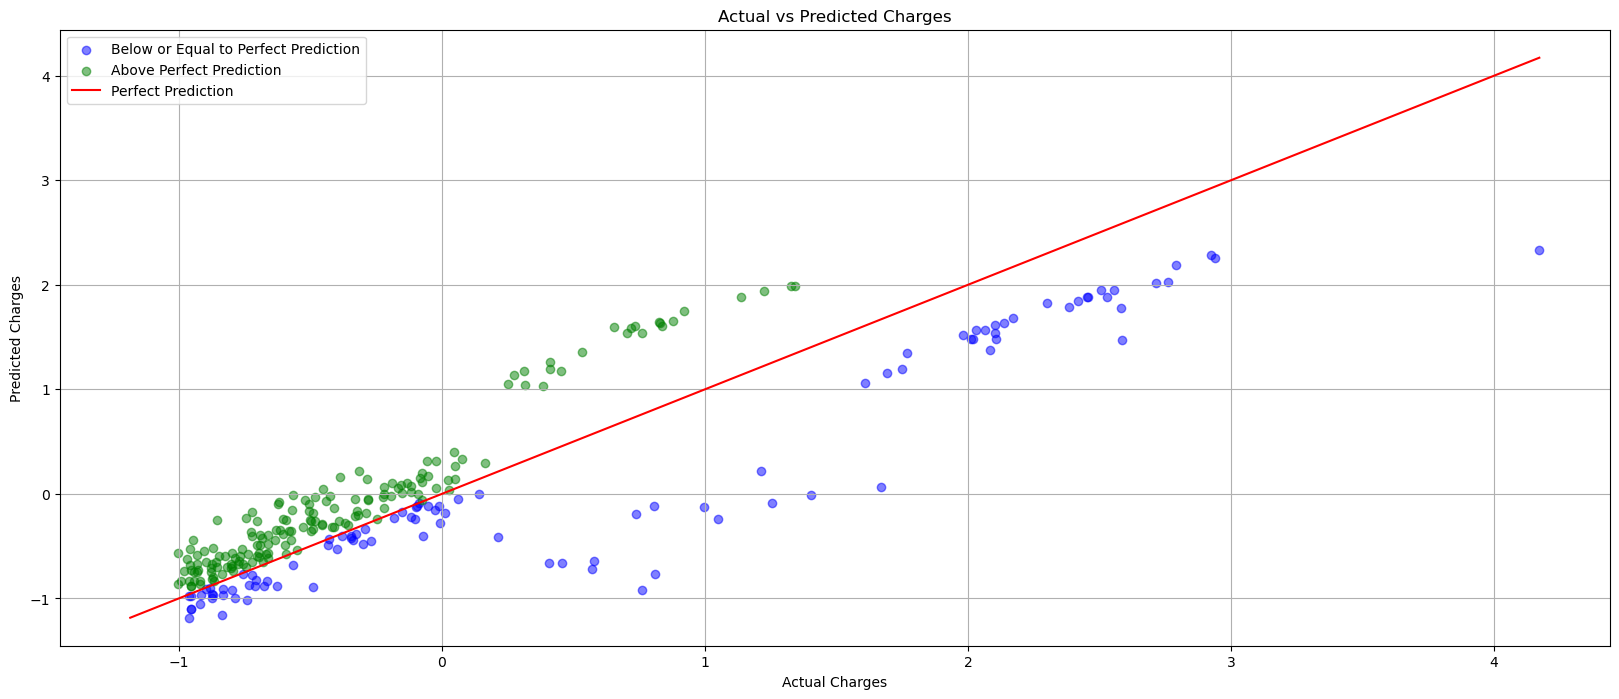

In [39]:
from sklearn.linear_model import LinearRegression
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_mlr = multiple_linear_regression.predict(X_test)

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(20, 8))

# Calculate perfect prediction line
max_value = max(max(y_test), max(y_pred_mlr))
min_value = min(min(y_test), min(y_pred_mlr))

# Scatter plot for Actual vs Predicted values
# Below the perfect prediction line
below_line = y_pred_mlr <= y_test
plt.scatter(y_test[below_line], y_pred_mlr[below_line], color='blue', alpha=0.5, label='Below or Equal to Perfect Prediction')

# Above the perfect prediction line
above_line = y_pred_mlr > y_test
plt.scatter(y_test[above_line], y_pred_mlr[above_line], color='green', alpha=0.5, label='Above Perfect Prediction')

# Plot a line representing perfect prediction (y = x)
plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Perfect Prediction')

# show result
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

### Support Vector Regression

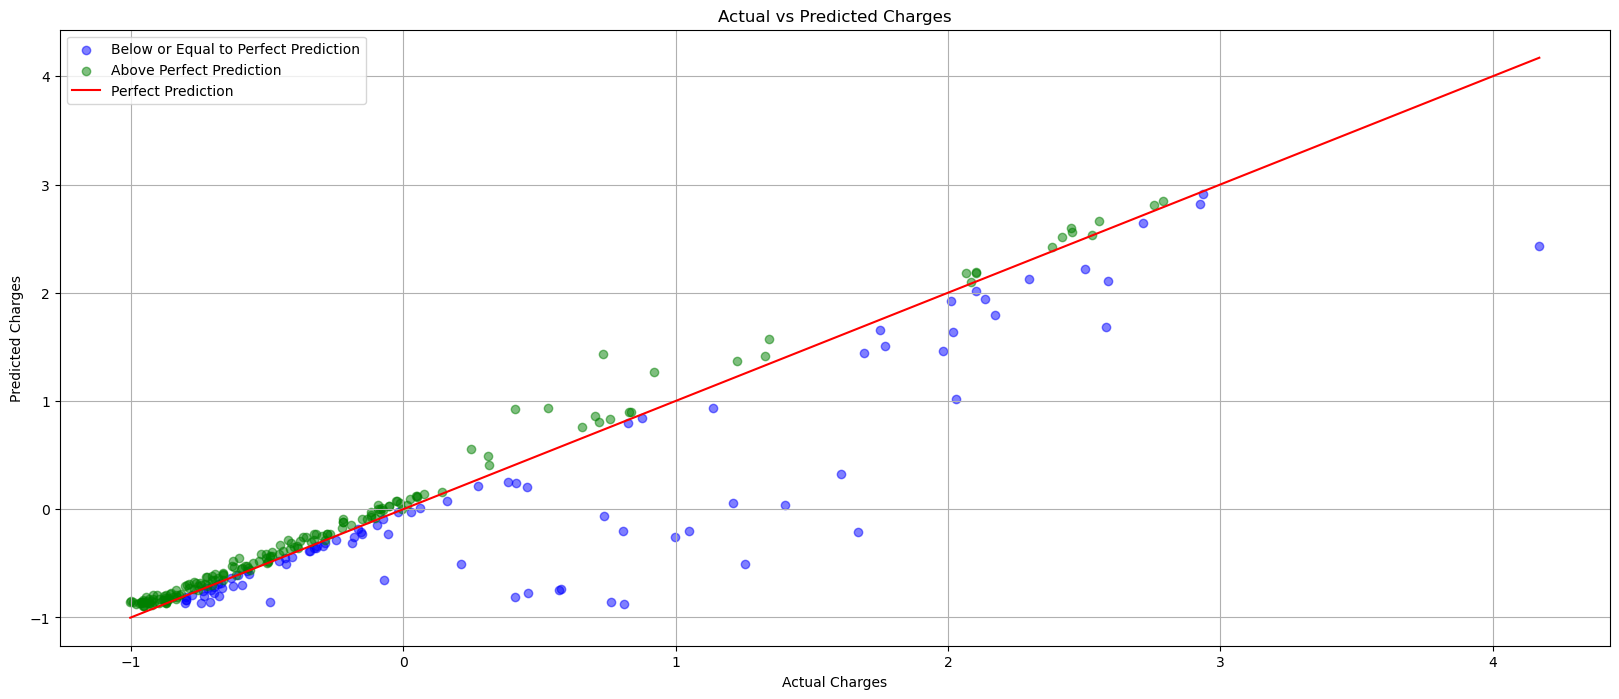

In [40]:
from sklearn.svm import SVR
support_vector_regression = SVR(kernel='rbf')
support_vector_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = support_vector_regression.predict(X_test)

# Visualize actual vs. predicted values for the test set
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(20, 8))

# Calculate perfect prediction line
max_value = max(max(y_test), max(y_pred_svr))
min_value = min(min(y_test), min(y_pred_svr))

# Scatter plot for Actual vs Predicted values
# Below the perfect prediction line
below_line = y_pred_svr <= y_test
plt.scatter(y_test[below_line], y_pred_svr[below_line], color='blue', alpha=0.5, label='Below or Equal to Perfect Prediction')

# Above the perfect prediction line
above_line = y_pred_svr > y_test
plt.scatter(y_test[above_line], y_pred_svr[above_line], color='green', alpha=0.5, label='Above Perfect Prediction')

# Plot a line representing perfect prediction (y = x)
plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Perfect Prediction')

# show result
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

### Model Evaluation

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
# evaluate multiple linear regression model
r2_mlr = r2_score(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)

# evaluate support vector regression model
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the evaluation metrics and compare Multiple Linear Regression and Support Vector Regression
print(f'MAE: \nMultiple Linear Regression: {mae_mlr} \nSupport Vector Regression: {mae_svr}')
print(f'\nMSE: \nMultiple Linear Regression: {mse_mlr} \nSupport Vector Regression: {mse_svr}')
print(f'\nRMSE: \nMultiple Linear Regression: {rmse_mlr} \nSupport Vector Regression: {rmse_svr}')
print(f'\nR2 Score: \nMultiple Linear Regression: {r2_mlr} \nSupport Vector Regression: {r2_svr}')

MAE: 
Multiple Linear Regression: 0.351952862665193 
Support Vector Regression: 0.1731883621148118

MSE: 
Multiple Linear Regression: 0.2355138005515096 
Support Vector Regression: 0.14092001899988077

RMSE: 
Multiple Linear Regression: 0.48529764119714164 
Support Vector Regression: 0.3753931525745785

R2 Score: 
Multiple Linear Regression: 0.7776932310583375 
Support Vector Regression: 0.8669824272305882
